In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
from pmdarima import auto_arima

In [5]:
df = pd.read_csv('co2_mm_mlo.csv')

In [6]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [7]:
df['date'] = pd.to_datetime({'year':df['year'], 'month':df['month'], 'day':1})

In [8]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [10]:
df = df.set_index('date')

In [11]:
df.index.freq = 'MS'

In [12]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


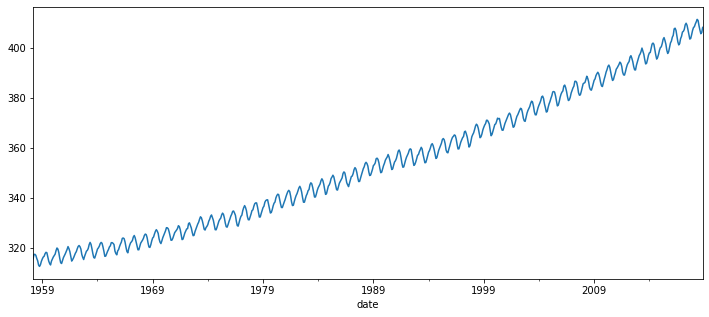

In [14]:
df['interpolated'].plot(figsize=(12,5))

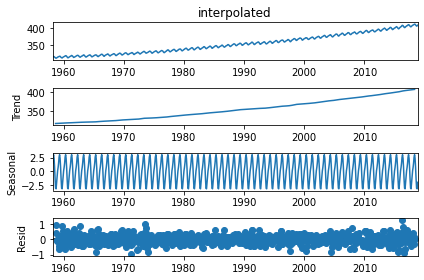

In [18]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

In [19]:
auto_arima(df['interpolated'], seasonal=True, m=12).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.252
Date:                            Sat, 15 Aug 2020   AIC                            424.505
Time:                                    10:21:37   BIC                            452.046
Sample:                                         0   HQIC                           435.132
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3510      0.083      4.212      0.000       0.188       0.514
ar.L2          0.0873      0.058      1.501      0.133      -0.027       0.201
ma.L1         -0.7060      0.088     -8.048      0.000      -0.878      -0.534
ar.S.L12       0.9996      0.000   2992.587      0.000       0.999       1.000
ma.S.L12      -0.8665      0.021    -40.618      0.000      -0.908      -0.825
sigma2         0.0956      0.005     20.438      0.000       0.086       0.105
===================================================================================
Ljung-Box (Q):                       43.76   Jarque-Bera (JB):                 4.47
Prob(Q):                              0.31   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
train = df.iloc[:717]
test = df.iloc[717:]

In [21]:
model = SARIMAX(train['interpolated'], order=(2,1,1), seasonal_order=(1,0,1,12))

In [22]:
results = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.889
Date:                            Sat, 15 Aug 2020   AIC                            415.778
Time:                                    12:03:32   BIC                            443.220
Sample:                                03-01-1958   HQIC                           426.374
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3481      0.091      3.813      0.000       0.169       0.527
ar.L2          0.0852      0.025      3.393      0.001       0.036       0.134
ma.L1         -0.7021      0.076     -9.210      0.000      -0.851      -0.553
ar.S.L12       0.9996      0.000   2845.631      0.000       0.999       1.000
ma.S.L12      -0.8655      0.023    -37.820      0.000      -0.910      -0.821
sigma2         0.0954      0.005     20.324      0.000       0.086       0.105
===================================================================================
Ljung-Box (Q):                       44.40   Jarque-Bera (JB):                 4.61
Prob(Q):                              0.29   Prob(JB):                         0.10
Heteroskedasticity (H):               1.14   Skew:                             0.01
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
start = len(train)
end = len(train) + len(test) - 1

In [25]:
predictions = results.predict(start, end, typ='levels').rename('SARIMA Predictions')

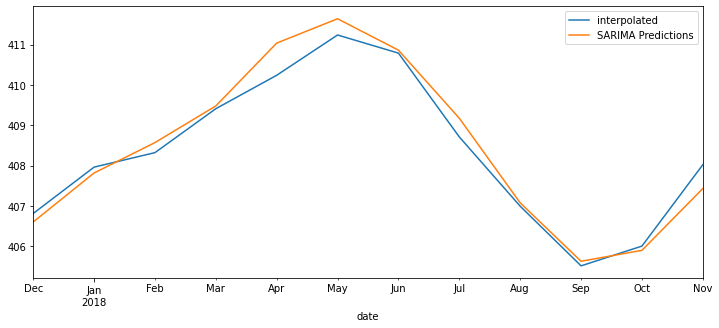

In [26]:
test['interpolated'].plot(legend=True, figsize=(12,5))
predictions.plot(legend=True)

In [27]:
from statsmodels.tools.eval_measures import rmse

In [28]:
error = rmse(test['interpolated'], predictions)
error

0.35756143314487643

In [29]:
test['interpolated'].mean()

408.3333333333333

In [30]:
model = SARIMAX(df['interpolated'], order=(2,1,1), seasonal_order=(1,0,1,12))
results = model.fit()
fcast = results.predict(len(df), len(df)+11, typ='levels').rename('SARIMA Forecast')

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


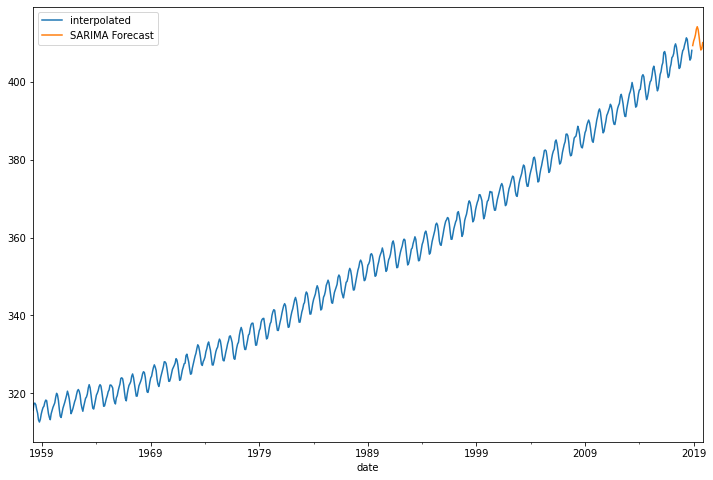

In [32]:
df['interpolated'].plot(figsize=(12,8), legend=True)
fcast.plot(legend=True)